<a href="https://colab.research.google.com/github/marawan1805/DataEngineering/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Car_sale_ads.csv')
df.head(3)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."


**Data Cleaning**

In [6]:
#when we used the df.isnull().sum() function we found that these following columns had too many missing values 
# and needed to be droped

df.drop('Vehicle_version' , axis = 1 , inplace = True)
df.drop('Vehicle_generation' , axis = 1 , inplace = True)
df.drop('CO2_emissions' , axis = 1  , inplace = True)
df.drop('Drive' , axis = 1 ,  inplace = True)
df.drop('Origin_country' , axis = 1 , inplace = True)
df.drop('First_owner' , axis = 1 , inplace = True)
df.drop('First_registration_date' , axis = 1 , inplace = True)



In [7]:
# here the columns with missing values have to be delt with by using imputations that are done below 
df.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 983
Power_HP                   643
Displacement_cm3          1966
Fuel_type                    0
Transmission               479
Type                         0
Doors_number              1487
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

**Detecting and Removing Outliers**

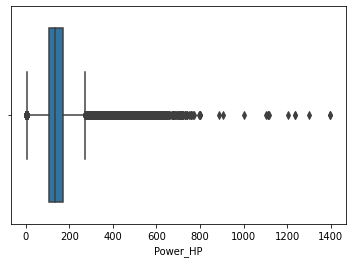

In [9]:
#box-plot before removing outliers
sns.boxplot(x=df['Power_HP'])

In [10]:
Q1 = df['Power_HP'].quantile(0.25)
Q3 = df['Power_HP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

67.0


In [11]:
arr_1 = df['Power_HP'] < (Q1 - 1.5 * IQR)
arr_2 = df['Power_HP'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [12]:
print("No. of outliers: ", mask.sum())


No. of outliers:  14090


In [14]:
#Removing the outliers
df = df[~(mask)]
df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,Manual,small_cars,1.0,other,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,Manual,station_wagon,4.0,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,Manual,SUV,3.0,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,Manual,minivan,2.0,blue,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


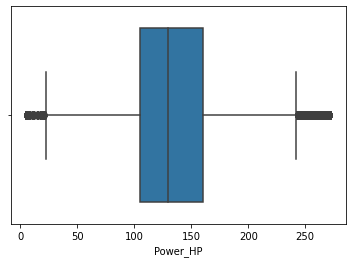

In [15]:
#box-plot after removing outliers
sns.boxplot(x=df['Power_HP'])

*******************************************************

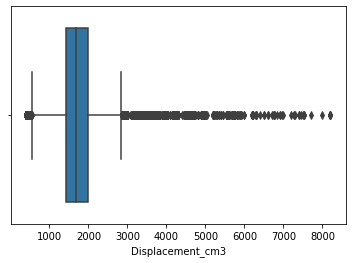

In [16]:
#box-plot before removing outliers
sns.boxplot(x=df['Displacement_cm3'])


In [17]:
Q1 = df['Displacement_cm3'].quantile(0.25)
Q3 = df['Displacement_cm3'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

573.0


In [18]:
arr_1 = df['Displacement_cm3'] < (Q1 - 1.5 * IQR)
arr_2 = df['Displacement_cm3'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [19]:
print("No. of outliers: ", mask.sum())


No. of outliers:  9205


In [20]:
#Removing the outliers
df = df[~(mask)]
df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,Manual,small_cars,1.0,other,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,Manual,station_wagon,4.0,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,Manual,SUV,3.0,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,Manual,minivan,2.0,blue,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


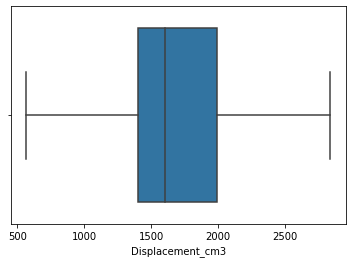

In [21]:
#box-plot after removing outliers
sns.boxplot(x=df['Displacement_cm3'])


*******************************************************

In [22]:
# here we filled in the missing values using the mode as this is a categorcal variable

df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 793
Power_HP                   609
Displacement_cm3          1652
Fuel_type                    0
Transmission                 0
Type                         0
Doors_number              1286
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

In [26]:
#fill the missing values for numerical terms - mean(Continous Variables) - after removing outliers
df['Power_HP'] = df['Power_HP'].fillna(df['Power_HP'].mean())
df['Displacement_cm3'] = df['Displacement_cm3'].fillna(df['Displacement_cm3'].mean())
df['Doors_number'] = df['Doors_number'].fillna(df['Doors_number'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [29]:
# Here we selected the not null rows and put them in the dataframe

df = df[df['Mileage_km'].notna()]


In [31]:
df.isnull().sum()

Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64

**Data Visulization**